In [272]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [273]:
%pwd

'/tf'

In [274]:
def getFiles(basePath):
    files =  glob(basePath);
    files.sort();
    return files;

In [275]:
def getFilesNew(basePath):
    dirs = glob(basePath+"/*/")
    #print(dirs)
    for _dir in dirs:
        files = glob(_dir+"*B?*.tiff")
        #print(files)
        yield files

In [276]:
S_sentinel_bands_forest = list(getFilesNew("/tmp/shared/sentianel2dataset3/forest"))
S_sentinel_bands_forest

[['/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B8A_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/forest/1/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
  '/tmp/shared/sent

In [277]:
S_sentinel_bands_town = list(getFilesNew("/tmp/shared/sentianel2dataset3/town"))
S_sentinel_bands_town

[['/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/town/1/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_B8A_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/tow

In [278]:
S_sentinel_bands_water = list(getFilesNew("/tmp/shared/sentianel2dataset3/water"))
S_sentinel_bands_water

[['/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B8A_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/water/1/2022-08-30-00_00_2022-08-30-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
  '/tmp/shared/sentianel2dat

In [279]:
S_sentinel_bands_sands = list(getFilesNew("/tmp/shared/sentianel2dataset3/sands"))
S_sentinel_bands_sands

[['/tmp/shared/sentianel2dataset3/sands/1/2022-08-01-00_00_2022-08-01-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/sands/1/2022-08-01-00_00_2022-08-01-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/sands/1/2022-08-01-00_00_2022-08-01-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/sands/1/2022-08-01-00_00_2022-08-01-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/sands/1/2022-08-01-00_00_2022-08-01-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/sands/1/2022-08-01-00_00_2022-08-01-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/sands/1/2022-08-01-00_00_2022-08-01-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/sands/1/2022-08-01-00_00_2022-08-01-23_59_Sentinel-2_L2A_B8A_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/sands/1/2022-08-01-00_00_2022-08-01-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
  '/tmp/shared/sentianel2dat

In [280]:
S_sentinel_bands_field = list(getFilesNew("/tmp/shared/sentianel2dataset3/field"))
S_sentinel_bands_field

[['/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B8A_(Raw).tiff',
  '/tmp/shared/sentianel2dataset3/field/1/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
  '/tmp/shared/sentianel2dat

In [281]:
def getFilesArrayNew(paths):
    l = []
    for i in paths:
        s = []
        for j in i:
            with rio.open(j, 'r') as f:
                s.append(f.read(1))
        l.append(s)
    arr_st_new = np.stack(l)
    return  arr_st_new

In [282]:
forest_st = getFilesArrayNew(S_sentinel_bands_forest);

In [283]:
town_st = getFilesArrayNew(S_sentinel_bands_town);

In [284]:
sands_st = getFilesArrayNew(S_sentinel_bands_sands);

In [285]:
water_st = getFilesArrayNew(S_sentinel_bands_water);

In [286]:
field_st = getFilesArrayNew(S_sentinel_bands_field);

In [287]:
def cropImages(images):
    return images[:,:,0:760,0:1200]

In [288]:
town_st = cropImages(town_st)
water_st = cropImages(water_st)
forest_st = cropImages(forest_st)
sands_st = cropImages(sands_st)
field_st = cropImages(field_st)

In [289]:
def reshapeImages(images):
    shape = images.shape
    return  np.reshape(images, (shape[1],shape[2],shape[3]*shape[0]))

In [290]:
town_st = reshapeImages(town_st)

In [291]:
water_st = reshapeImages(water_st)

In [292]:
forest_st = reshapeImages(forest_st)

In [293]:
sands_st = reshapeImages(sands_st)

In [294]:
field_st = reshapeImages(field_st)

In [295]:
x_forest = np.moveaxis(forest_st, 0, -1);
x_forest.shape

(760, 3600, 12)

In [296]:
x_sands = np.moveaxis(sands_st, 0, -1);
x_sands.shape

(760, 1200, 12)

In [297]:
x_town = np.moveaxis(town_st, 0, -1);
x_town.shape

(760, 1200, 12)

In [298]:
x_water = np.moveaxis(water_st, 0, -1);
x_water.shape

(760, 3600, 12)

In [299]:
x_field = np.moveaxis(field_st, 0, -1);
x_field.shape

(760, 1200, 12)

In [323]:
def reshapeToTwoD(arr):
    return arr.reshape(-1,8,8,12)

In [324]:
xx_field = reshapeToTwoD(x_field)

In [325]:
xx_sands = reshapeToTwoD(x_sands)

In [326]:
xx_town = reshapeToTwoD(x_town)

In [327]:
xx_water = reshapeToTwoD(x_water)

In [328]:
xx_forest = reshapeToTwoD(x_forest)

In [422]:
x_train = np.append(xx_field, xx_sands, axis=0)
x_train = np.append(x_train, xx_town, axis=0)
x_train = np.append(x_train, xx_water, axis=0)
x_train = np.append(x_train, xx_forest, axis=0)
x_train.shape

(128250, 8, 8, 12)

In [333]:
y_data_field = np.full((xx_field.shape[0],xx_field.shape[1],xx_field.shape[2]),1)
y_data_sands = np.full((xx_sands.shape[0],xx_sands.shape[1],xx_sands.shape[2]),2)
y_data_town = np.full((xx_town.shape[0],xx_town.shape[1],xx_town.shape[2]),3)
y_data_water = np.full((xx_water.shape[0],xx_water.shape[1],xx_water.shape[2]),4)
y_data_forest = np.full((xx_forest.shape[0],xx_forest.shape[1],xx_forest.shape[2]),5)


In [334]:
y_data = np.append(y_data_field, y_data_sands, axis=0)
y_data = np.append(y_data, y_data_town, axis=0)
y_data = np.append(y_data, y_data_water, axis=0)
y_data = np.append(y_data, y_data_forest, axis=0)
y_data.shape


(128250, 8, 8)

In [404]:
x_train_norm = tf.keras.utils.normalize(x_train)
#x_train = np.moveaxis(x_train,2,0)

In [336]:
x_train.shape

(128250, 8, 8, 12)

In [423]:
std = np.std(x_train)
mean= np.mean(x_train)

x_train-=mean
x_train/=std

In [363]:
x_train.shape

(128250, 8, 8, 12)

In [337]:
print(y_data.shape)
#y_data = np.moveaxis(y_data,-1,0)

(128250, 8, 8)


In [223]:
y_data.shape

(128250, 8, 8)

In [311]:
#Let's import some important Libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [338]:
y_data_train_cate = np_utils.to_categorical(y_data)

In [339]:
y_data_train_cate.shape

(128250, 8, 8, 6)

In [227]:
x_data.shape

(128250, 8, 8, 12)

In [228]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd

In [528]:
from keras.layers import *
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
#Image Dimensions
width=8
height=8
channels=12

model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(8,8,12)))
model.add(Conv2D(32,(3,3),padding='same',input_shape=(8,8,12)))
model.add(Dropout(0.1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), padding='same'))
#model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
#We are naming this layer, as we will extract features from it in future, JUST WAIT !!!
model.add(MaxPooling2D(pool_size=(2,2),name='feature_layer'))
model.add(Conv2D(128,(3,3), padding='same'))
# model.add(Activation('relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(256,(3,3), padding='same'))
# model.add(Activation('relu'))
model.add(UpSampling2D((2,2)))
#model.add(Dropout(0.5))
model.add(Conv2D(6,(1,1),padding='same'))
model.add(Activation('relu'))
# model.add(Flatten())
# model.add(Dense(24))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(6))
#model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(6))
model.add(Reshape((-1,6)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy','MeanSquaredError'])
#Let's prepare the data for 2D-CNN


In [529]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 8, 8, 32)          3488      
                                                                 
 conv2d_96 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_18 (Dropout)        (None, 8, 8, 32)          0         
                                                                 
 activation_68 (Activation)  (None, 8, 8, 32)          0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_97 (Conv2D)          (None, 4, 4, 64)          18496     
                                                     

In [518]:
model_new = tf.keras.models.Sequential([
    Conv2D(32,(3,3),padding='same',input_shape=(8,8,12)),
    Dropout(0.2),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3), padding='same'),
    Activation('relu'),
    #We are naming this layer, as we will extract features from it in future, JUST WAIT !!!
    MaxPooling2D(pool_size=(2,2),name='feature_layer'),
    UpSampling2D((4,4)),
    Conv2D(6,(1,1),padding='same'),
    Activation('relu'),
    # model.add(Flatten())
    # model.add(Dense(24))
    # model.add(Activation('relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(6))
    Dense(6),
    Reshape((-1,6)),
    Activation('softmax'),
])

In [258]:
model_new.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy','MeanSquaredError'])

In [259]:
model_new.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 8, 8, 32)          3488      
                                                                 
 dropout_27 (Dropout)        (None, 8, 8, 32)          0         
                                                                 
 activation_55 (Activation)  (None, 8, 8, 32)          0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 4, 4, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_100 (Conv2D)         (None, 4, 4, 64)          18496     
                                                                 
 activation_56 (Activation)  (None, 4, 4, 64)          0         
                                                     

In [342]:
yy_train = y_data_train_cate.reshape(-1,64,6)

In [343]:
yy_train.shape

(128250, 64, 6)

In [232]:
tf.config.run_functions_eagerly(True)

In [201]:
import tensorflow as tf
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [202]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


In [530]:
history=model.fit(x_train,yy_train,epochs=2,batch_size=512,validation_split=0.1,callbacks=[tensorboard_callback])

Epoch 1/2


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


226/226 [==============================] - 45s 201ms/step - loss: 0.1742 - accuracy: 0.9365 - mean_squared_error: 0.0138 - val_loss: 0.0029 - val_accuracy: 1.0000 - val_mean_squared_error: 4.4782e-06
Epoch 2/2
226/226 [==============================] - 43s 190ms/step - loss: 0.0368 - accuracy: 0.9947 - mean_squared_error: 0.0014 - val_loss: 0.0046 - val_accuracy: 1.0000 - val_mean_squared_error: 1.3407e-05


In [321]:
save_path = "/tmp/shared/cnn_knn_plus2_70.h5"
model.save(save_path)

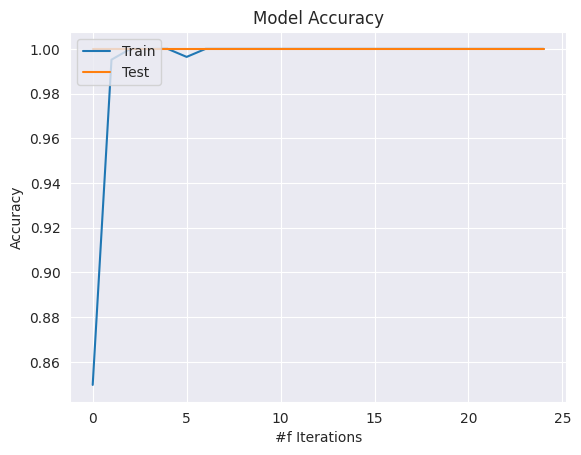

In [107]:
#history.history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

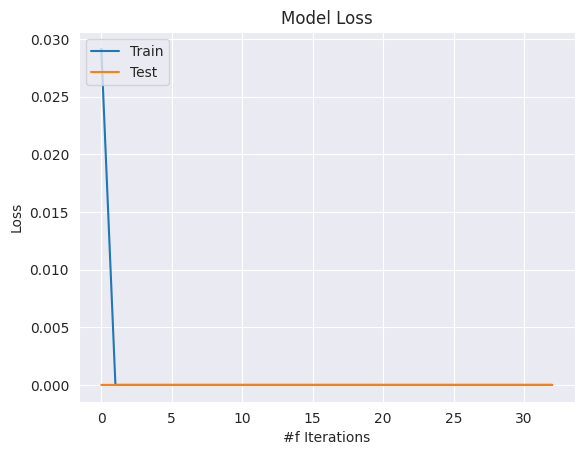

In [175]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [149]:
pred1 = model.predict(x_data_Test)

401/401 [==============================] - 2s 5ms/step


In [160]:
print(x_data_Test.shape)
print(pred1.shape)
print(y_data_test.shape)
pred1_max = np.argmax(pred1,axis=2)
pred1_max = pred1.reshape(-1)
y_data_test2 = y_data_test.reshape(-1)
#y_data_test2.shape
print(y_data_test2.shape)
print(pred1_max.shape)

(12824, 8, 8, 12)
(12824, 64, 6)
(8, 8, 12824)
(820736,)
(4924416,)


NameError: name 'y_data_test2' is not defined

In [158]:
accuracy_score(pred1_max, y_data_test2)

ValueError: Found input variables with inconsistent numbers of samples: [4924416, 820736]

# Other tests

In [191]:
from keras.models import Model
new_model=Model(inputs=model.input,outputs=model.get_layer('feature_layer').output)
test_xx = new_model.predict(x_data_Test)

  1/268 [..............................] - ETA: 16s

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


268/268 [==============================] - 1s 3ms/step


In [192]:
test_xx.shape

(8549, 1, 1, 64)

In [48]:
!pip install keras-segmentation

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.3/753.3 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 5.7 MB/s eta 0:00:00:00:0100:01
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29063 sha256=8624703be3d3aef8dd0d120edd735371e7e265b3c344017208ac848eedfb121e
  Stored in directory: /root/.cache/pip/wheels/8f/86/73/3dc66376905add0f57142bdd6e2117db5d4aa6340e34d039c7
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.21.2
    Uninstalling imageio-2.21.2:
      Successfully uninstalled imageio-2.21.2
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False,

In [108]:
img_input = Input(shape=(8,8,12 ))

conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(img_input)
conv1 = Dropout(0.2)(conv1)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Dropout(0.2)(conv2)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)

In [110]:
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Dropout(0.2)(conv3)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)

up1 = concatenate([UpSampling2D((2, 2))(conv3), conv2], axis=-1)
conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
conv4 = Dropout(0.2)(conv4)
conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)

up2 = concatenate([UpSampling2D((2, 2))(conv4), conv1], axis=-1)
conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2)
conv5 = Dropout(0.2)(conv5)
conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)

In [111]:
out = Conv2D(6, (1, 1) , padding='same')(conv5)

from keras_segmentation.models.model_utils import get_segmentation_model

model2 = get_segmentation_model(img_input ,  out ) # this would build the segmentation model

In [112]:
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 8, 8, 12)]   0           []                               
                                                                                                  
 conv2d_46 (Conv2D)             (None, 8, 8, 32)     3488        ['input_5[0][0]']                
                                                                                                  
 dropout_20 (Dropout)           (None, 8, 8, 32)     0           ['conv2d_46[0][0]']              
                                                                                                  
 conv2d_47 (Conv2D)             (None, 8, 8, 32)     9248        ['dropout_20[0][0]']             
                                                                                            

In [26]:
# def createVector(arr):
#     arr1 = arr.reshape(-1, 12)
#     #scaler = StandardScaler().fit(arr1)
#     #
#     #X_scaled = scaler.transform(arr1)
#     return arr1

In [27]:
# forest_data = createVector(x_forest)
# town_data = createVector(x_town)
# sands_data = createVector(x_sands)
# water_data = createVector(x_water)
# field_data = createVector(x_field);

In [28]:
# p = np.append(forest_data, town_data, axis=0)
# p = np.append(p, sands_data, axis=0)
# p = np.append(p, water_data, axis=0)
# p = np.append(p, field_data, axis=0)

In [106]:
# y_data_forest = np.full(forest_data.shape[0],1)
# y_data_town = np.full(town_data.shape[0],2)
# y_data_sands = np.full(sands_data.shape[0],3)
# y_data_water = np.full(water_data.shape[0],4)
# y_data_field = np.full(field_data.shape[0],5)

In [107]:
# y_data = np.append(y_data_forest, y_data_town)
# y_data = np.append(y_data, y_data_sands)
# y_data = np.append(y_data, y_data_water)
# y_data = np.append(y_data, y_data_field)
# y_data.shape

(8672500,)

In [108]:
# y_data2 = y_data.reshape(10,10,-1)
# y_data2.shape

(10, 10, 86725)

# Check model

In [428]:
from glob import glob
S_sentinel_bands = glob("/tmp/shared/test_images2/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-

In [429]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [430]:
arr_st = np.stack(l)

In [431]:
x = np.moveaxis(arr_st, 0, -1)
x.shape

(733, 1250, 12)

In [432]:
x = x[0:720,0:1200,:]
x.shape

(720, 1200, 12)

In [433]:
x_r = reshapeToTwoD(x)

In [434]:
x_r.shape

(13500, 8, 8, 12)

In [412]:
x_norm = tf.keras.utils.normalize(x_r)

In [264]:
#x_norm = np.moveaxis(x_norm,2,0)

In [435]:
std1 = np.std(x_r)
mean1= np.mean(x_r)

x_r-=mean1
#x_data-=mean
x_r/=std1

In [121]:
y_data_test = loadmat('/tmp/shared/test_images2/labeling.mat')['data']
y_data_test.shape

(733, 1250)

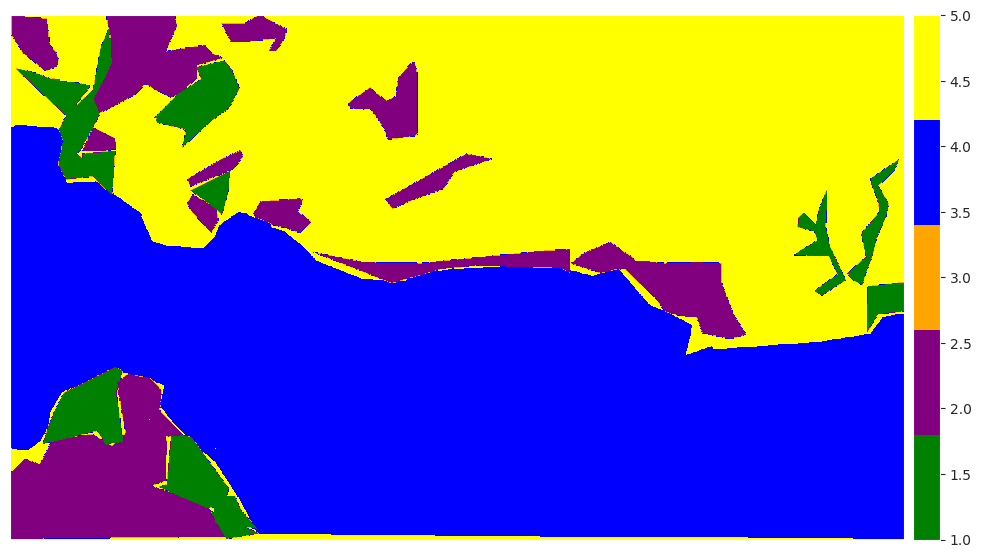

<AxesSubplot:>

In [122]:
ep.plot_bands(y_data_test,
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))

In [531]:
prediction = model.predict(x_r,batch_size=512)

27/27 [==============================] - 1s 39ms/step


In [532]:
prediction.shape

(13500, 64, 6)

In [533]:
pred_cat = np.argmax(prediction,axis=2)
pred_cat.shape

(13500, 64)

In [534]:
pred_pxl = pred_cat.reshape(720,1200)

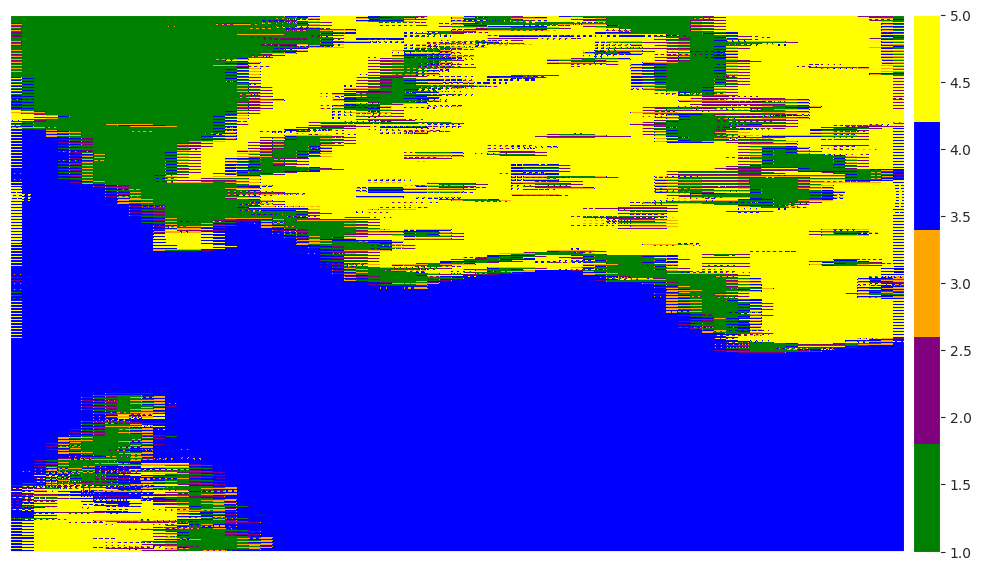

<AxesSubplot:>

In [535]:
ep.plot_bands(pred_pxl,
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))

In [536]:
pred_vec = pred_cat.reshape(-1)
pred_vec.shape

(864000,)

In [537]:
y_data_test2 = y_data_test[0:720,0:1200].reshape(-1)
y_data_test2.shape

(864000,)

In [538]:
accuracy_score(y_data_test2, pred_vec)

0.7510011574074074